# The Basic Stuff

In [100]:
# Data handling and numerical operations
import numpy as np
import os

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Image processing and transformations
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualization
import matplotlib.pyplot as plt

### Convolutions:
- Create the Binary Array: A 50x50 binary array representing the letter "F."
- Define Convolution Filters: Three different filters to detect various features of the "F."
- Apply Convolution: Perform convolution on the binary array using the filters.
- Visualize the Results: Display the original binary array, the filters, and the outputs after applying each filter.

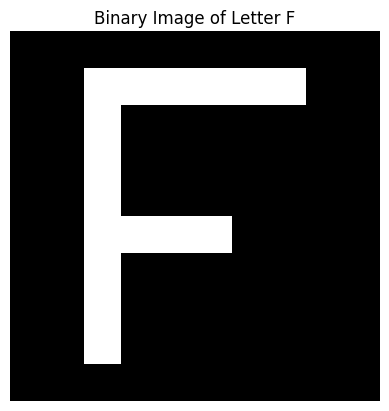

In [144]:
# Create a 50x50 binary image of the letter 'F'
image = np.zeros((50, 50), dtype=int)

# Draw the letter 'F'
image[5:45, 10:15] = 1  # Vertical part
image[5:10, 10:40] = 1  # Top horizontal part
image[25:30, 10:30] = 1  # Middle horizontal part

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Binary Image of Letter F')
plt.axis('off')
plt.show()


In [135]:
# Define convolution filters
filters = {
    'vertical': np.array([[1, 0, -1],
                          [1, 0, -1],
                          [1, 0, -1]]),
    
    'horizontal': np.array([[1, 1, 1],
                            [0, 0, 0],
                            [-1, -1, -1]]),
    
    'box': np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]]) / 9  # Normalize the box filter
}


In [136]:
from scipy.signal import convolve2d

# Function to apply filters and display results
def apply_filters(image, filters):
    outputs = {}
    
    for name, kernel in filters.items():
        # Convolve the image with the filter
        output = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)
        outputs[name] = output
    
    return outputs

# Apply filters to the image
outputs = apply_filters(image, filters)


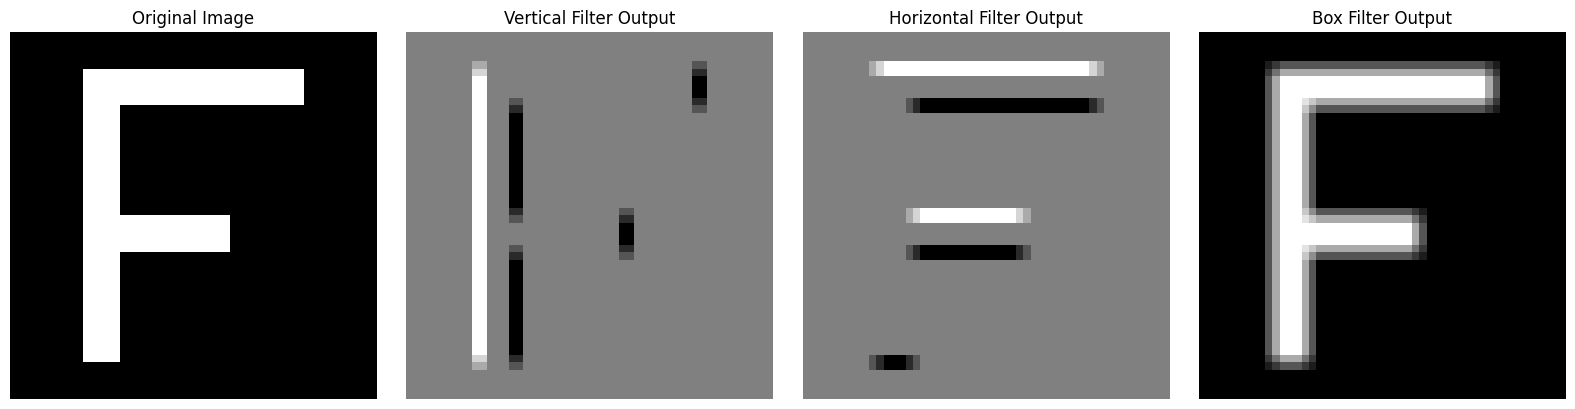

In [137]:
# Plot original image and filter outputs
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Display original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display outputs of each filter
for ax, (name, output) in zip(axes[1:], outputs.items()):
    ax.imshow(output, cmap='gray', vmin=output.min(), vmax=output.max())
    ax.set_title(f'{name.capitalize()} Filter Output')
    ax.axis('off')

plt.tight_layout()
plt.show()


### Max-Pooling

In [105]:
def max_pooling(image, pool_size=2, stride=2):
    h, w = image.shape
    pooled_h = (h - pool_size) // stride + 1
    pooled_w = (w - pool_size) // stride + 1
    pooled_image = np.zeros((pooled_h, pooled_w))

    for i in range(0, pooled_h):
        for j in range(0, pooled_w):
            pooled_image[i, j] = np.max(image[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size])

    return pooled_image

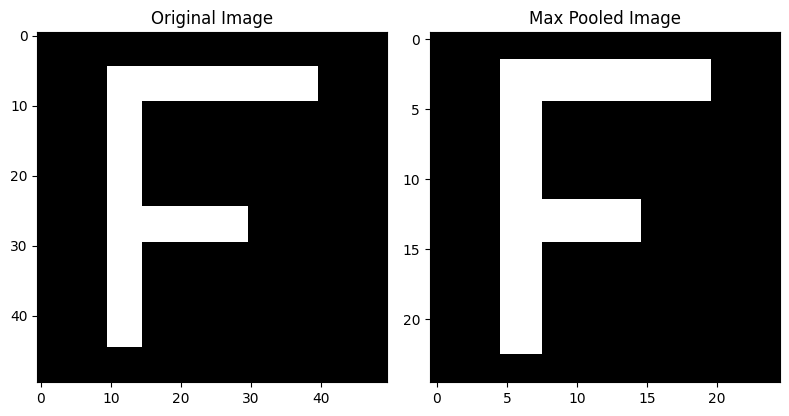

In [143]:
pooled_image = max_pooling(image, pool_size=2, stride=2)

# Plot original image and pooled image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

# Display pooled image
axes[1].imshow(pooled_image, cmap='gray', vmin=pooled_image.min(), vmax=pooled_image.max())
axes[1].set_title('Max Pooled Image')

plt.tight_layout()
plt.show()

# Some Cool Resource: 
- **Convolutional Visualizer: https://deeplizard.com/resource/pavq7noze2**
- **Play Around wid dem NNs: - https://playground.tensorflow.org/**

# Lets Begin

In [152]:
data_dir = '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages'  # Update this path as necessary

# Create a data generator with image resizing and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # 20% of data will be used for validation
)

# Create training and validation data generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='sparse',  # For sparse categorical labels
    subset='training',  # Set as training data
    seed=42  # For reproducibility
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='sparse',  # For sparse categorical labels
    subset='validation',  # Set as validation data
    seed=42  # For reproducibility
)

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


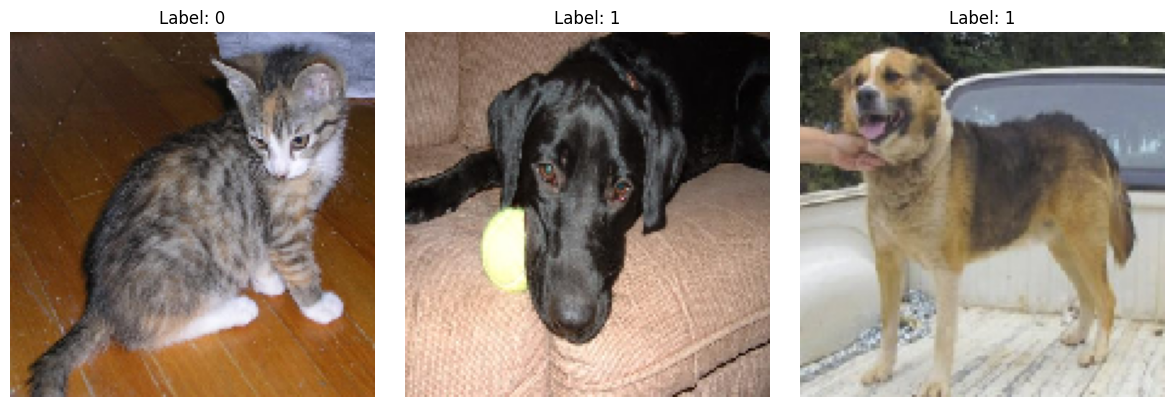

In [153]:
# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Set up the figure for displaying images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Loop through and display the first three images
for ax, img, label in zip(axes, images[:3], labels[:3]):
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axes
    ax.set_title(f'Label: {int(label)}')  # Display label

plt.tight_layout()
plt.show()

In [108]:
# Define the model
model = Sequential()

inputs = layers.Input(shape=(150, 150, 3))
model.add(inputs)

# First block
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))  # Dropout for regularization

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second block
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third block
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Global average pooling and dense layers
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Higher dropout before the output layer
model.add(layers.Dense(2, activation='softmax'))  # 2 output units for 2 classes (cats and dogs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_140 (Conv2D)             │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_141 (Conv2D)             │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_142 (Conv2D)             │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_143 (Conv2D)             │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_144 (Conv2D)             │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_145 (Conv2D)             │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 37, 37, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │             

 Total params: 844,930 (3.22 MB)

 Trainable params: 841,538 (3.21 MB)

 Non-trainable params: 3,392 (13.25 KB)

In [109]:
# Train the model
num_epochs = 20  # Number of epochs

history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator
)


Epoch 1/20


2024-10-26 09:21:16.754525: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,150,150]{3,2,1,0}, f32[64,64,150,150]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-26 09:21:16.833159: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.078741138s
Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,150,150]{3,2,1,0}, f32[64,64,150,150]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_con

 12/312 ━━━━━━━━━━━━━━━━━━━━ 39s 133ms/step - accuracy: 0.5373 - loss: 1.1979

/opt/conda/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 183ms/step - accuracy: 0.5716 - loss: 0.9518 - val_accuracy: 0.5005 - val_loss: 1.3080
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 52s 163ms/step - accuracy: 0.6403 - loss: 0.7294 - val_accuracy: 0.6175 - val_loss: 0.7474
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 52s 163ms/step - accuracy: 0.7140 - loss: 0.5938 - val_accuracy: 0.6736 - val_loss: 0.6086
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 55s 175ms/step - accuracy: 0.7485 - loss: 0.5188 - val_accuracy: 0.6530 - val_loss: 0.7707
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 54s 169ms/step - accuracy: 0.8075 - loss: 0.4255 - val_accuracy: 0.7075 - val_loss: 1.0663
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step - accuracy: 0.8373 - loss: 0.3724 - val_accuracy: 0.7131 - val_loss: 1.0189
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 52s 163ms/step - accuracy: 0.8730 - loss: 0.3040 - val_accuracy: 0.7532 - val_loss: 0.8728
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step - accuracy: 0.8929 - loss: 0.2571 - val

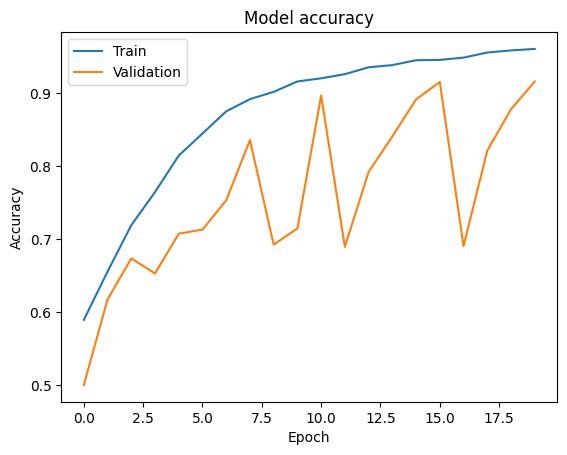

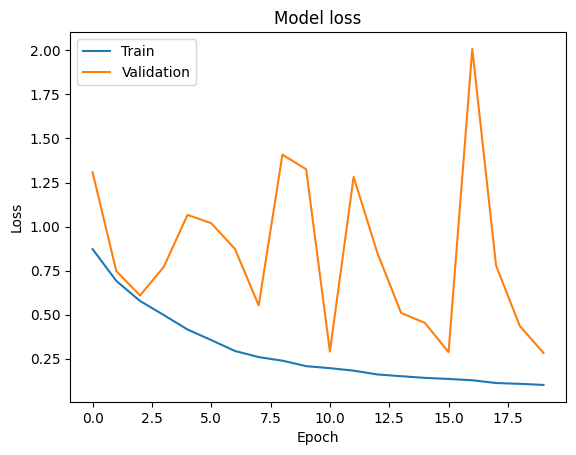

In [110]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [145]:
model.save_weights("model.weights.h5")

In [146]:
model.load_weights("model.weights.h5")

# Exercise - 1

- Step - 0: Normalize the data
- Step - 1: Split test data into test and validation
- Step - 2: Build a convolutional model
- Step - 3: Decide on Hyper Parameters like:
    - Learning Rate
    - No. of epochs
    - Experiment with 
    - Activation functions
    - No. of Units / neurons in each layer
    - Batch Size
    - (Optional) Dropout values
- Step - 4: Train the model (Monitor the Validation accuracy and loss)
- Step - 5: Evaluate on the Test Data
- Step - 6: Visualize the loss and accuracy

In [147]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / _ 
x_test = x_test.astype('float32') / _ 

# Display the shape of the dataset
print(f'Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Train data shape: (50000, 32, 32, 3), Train labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


In [ ]:
x_eval, x_test, y_eval, y_test = train_test_split(_, _, 
                                                  test_size=_, random_state=42)

In [148]:
model = models.Sequential([
    
    # Add layers here
    
    layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

# Compile the model
model.compile(optimizer=_,
              loss='sparse_categorical_crossentropy',  # Suitable for integer labels
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_146 (Conv2D)             │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_147 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,708 (2.12 MB)

 Trainable params: 556,708 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

In [150]:
# Train the model
history = model.fit(x_train, y_train, 
                    epochs=_, batch_size=_, validation_data=(x_eval, y_eval))


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5760 - loss: 1.5619 - val_accuracy: 0.3825 - val_loss: 2.6097
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5994 - loss: 1.4580 - val_accuracy: 0.3763 - val_loss: 2.6773
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6199 - loss: 1.3797 - val_accuracy: 0.3801 - val_loss: 2.7339
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6374 - loss: 1.3074 - val_accuracy: 0.3741 - val_loss: 2.7859
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6621 - loss: 1.2197 - val_accuracy: 0.3625 - val_loss: 2.8958
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6760 - loss: 1.1546 - val_accuracy: 0.3644 - val_loss: 3.0115
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6960 - loss: 1.0833 - val_accuracy: 0.3668 - val_loss: 3.1107
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7048 - loss: 1.0371 - val_accuracy: 0.

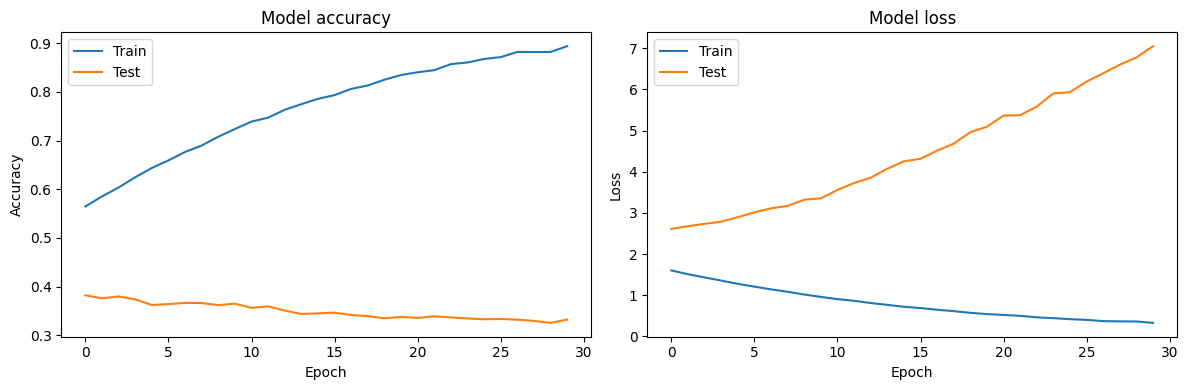

In [151]:
# Plotting the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


# Exercise - 2
- Build the same in PyTorch
- Try out A different dataset
- EnJoY!